In [26]:
#pip install fastdtw
import numpy as np
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt
import tensorflow as tf

In [55]:


# 데이터셋 생성 함수 (이전에 사용한 함수)
def create_toy_dataset(N, Frame, time):
    return np.random.rand(N, Frame, time)

# fastDTW를 사용하여 DTW 거리 계산
def calculate_fastdtw(series1, series2):
    distance, path = fastdtw(series1, series2, dist=euclidean)
    return distance

# 예제 데이터셋 생성
N, Frame, time = 10, 5, 15  # 예제 차원
dataset = create_toy_dataset(N, Frame, time)

# '1 x time' 데이터 선택
series1 = dataset[0, 0, :]
series2 = dataset[1, 0, :]  # 다른 시계열 데이터

# fastDTW 거리 계산
fastdtw_distance = calculate_fastdtw(series1[None], series2[None])
print(fastdtw_distance)

1.7755103192463573


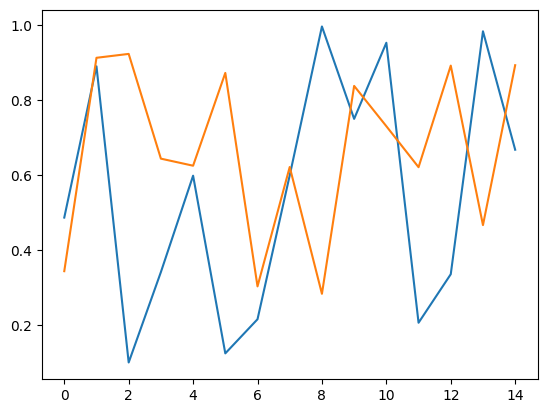

In [12]:
plt.plot(series1)
plt.plot(series2)

In [50]:
import numpy as np

def generate_random_cosine(dimensions, time_points, frequencies, phases):
    """Generate random cosine values for given dimensions and time points.

    Args:
    dimensions (int): Number of dimensions for which to generate cosine values.
    time_points (array): Array of time points at which to evaluate the cosine functions.

    Returns:
    ndarray: Array of cosine values for each dimension at each time point.
    """
    # Random frequencies and phases for each dimension
    #frequencies = np.random.rand(dimensions) * 2  # Random frequencies in range [0, 2]
    #phases = np.random.rand(dimensions) * 2 * np.pi  # Random phases in range [0, 2π]

    # Generate cosine values for each dimension at each time point
    cos_values = np.array([np.cos(2 * np.pi * frequencies[i] * time_points + phases[i])
                           for i in range(dimensions)])

    return cos_values

# Example usage
dimensions = 1  # Number of dimensions
time_points = np.linspace(0, 1, 1000)  # Time points from 0 to 1
cosine_values1 = generate_random_cosine(dimensions, time_points, [10.], [1.5])
cosine_values2 = generate_random_cosine(dimensions, time_points, [5.], [1.8])
cosine_values = np.concatenate([cosine_values1, cosine_values2], axis=0)
cosine_values.shape  # Should be (dimensions, len(time_points))

Cleaned = generate_random_cosine(dimensions, np.linspace(0, 1, 50), [2.8], [1.8])
Raw = generate_random_cosine(dimensions, np.linspace(0, 1, 50), [1.8], [1.1])


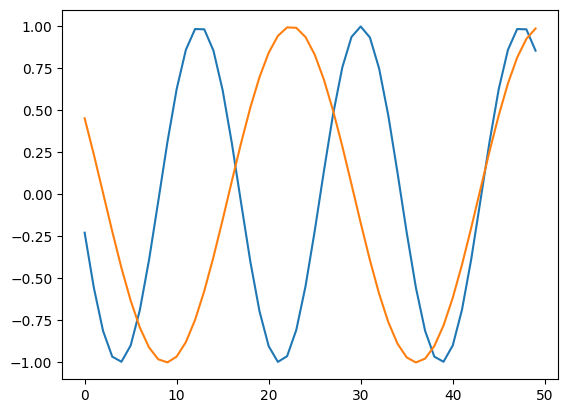

In [51]:
plt.plot(Cleaned[0])
plt.plot(Raw[0])

(5.3090174922608835, 5.283039391164411)

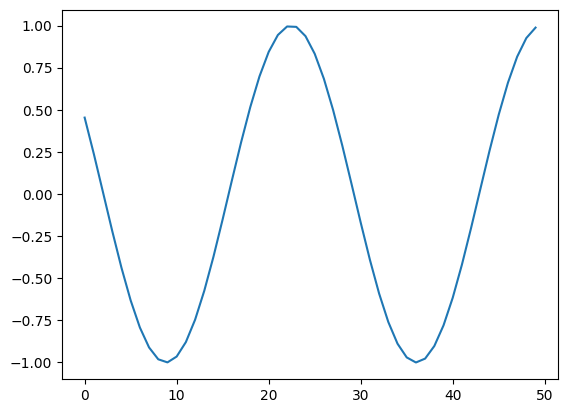

In [64]:
cosine_values_frame =  tf.signal.frame(cosine_values, 50, 10).numpy()

fastdtw_distance_clean = []
fastdtw_distance_raw = []

for i in cosine_values_frame:
    for j in i :
        fastdtw_distance_clean.append(calculate_fastdtw(j[None], Cleaned))
        fastdtw_distance_raw.append(calculate_fastdtw(j[None], Raw)) 
        
MinDTWClean = np.min(fastdtw_distance_clean)   
MinDTWRaw = np.min(fastdtw_distance_raw)   

if MinDTWClean <= MinDTWRaw:
    plt.plot(Cleaned[0])
else:
    plt.plot(Raw[0])
MinDTWClean, MinDTWRaw